In [2]:
import seaborn as sns
from statannot import add_stat_annotation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
sns.set(style='white',font_scale=1.5,)


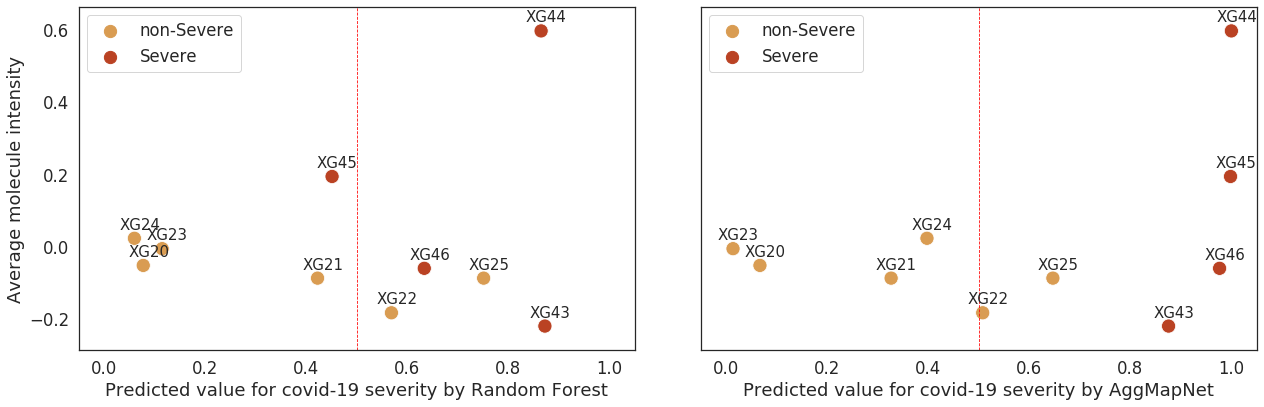

In [3]:
df = pd.read_csv('./org_paper/Shen_Fig2D.csv')
df['Group'] = df.y_true.map({0:'non-Severe', 1:'Severe'})
palette = ['#d99c52', '#ba4223']

fig, axes = plt.subplots(ncols=2, figsize= (18,6), sharey=True)

ax, ax2 = axes

g =sns.scatterplot(x = 'y_score', y = 'avg_intensity', s= 200, palette = palette,
                   hue = 'Group', ax= ax, data=df)

ax.set_xlabel('Predicted value for covid-19 severity by Random Forest')
ax.set_ylabel('Average molecule intensity')

ax.set_xlim(-0.05,1.05)

ax.axvline(x=0.5, ls = '--', color= 'red', lw = 0.8)

for i in range(len(df)):
    d = df.iloc[i]
    x = d['y_score']
    y1 = d['avg_intensity']
    ax.text(x-0.03,y1 + 0.025, '%s' % d['sample'], fontsize=15)
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
lgnd = ax.legend_
lgnd.legendHandles[0]._sizes = [150]
lgnd.legendHandles[1]._sizes = [150]

df2 = pd.read_csv('./test_predict_res.csv', index_col=0)
df2['avg_intensity'] = df.avg_intensity
df2['Group'] = df.Group
df2['sample'] = df2['index']


g =sns.scatterplot(x = 'y_score', y = 'avg_intensity', s= 200, palette = palette,
                   hue = 'Group', ax= ax2, data=df2)

ax2.set_xlabel('Predicted value for covid-19 severity by AggMapNet')
ax2.set_ylabel('Average molecule intensity')

ax2.set_xlim(-0.05,1.05)

ax2.axvline(x=0.5, ls = '--', color= 'red', lw = 0.8)

for i in range(len(df2)):
    d = df2.iloc[i]
    x = d['y_score']
    y1 = d['avg_intensity']
    ax2.text(x-0.03,y1 + 0.025, '%s' % d['sample'], fontsize=15)
    
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles[1:], labels=labels[1:])

lgnd = ax2.legend_
lgnd.legendHandles[0]._sizes = [150]
lgnd.legendHandles[1]._sizes = [150]

plt.tight_layout(w_pad = 2)
plt.savefig('./RF_AggMapNet_comp.png', dpi = 400, bbox_inches="tight")

In [4]:
from scipy.stats import pearsonr
pcc, p = pearsonr(df.y_score, df2.y_score)
print('Pearson correlation coefficient for RF and AMN prediction is %.3f, the p-value: %.3f' % (pcc,p))

Pearson correlation coefficient for RF and AMN prediction is 0.790, the p-value: 0.006


## calculate RF performance

In [5]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.metrics import auc as calculate_auc

def prc_auc_score(y_true, y_score):
    precision, recall, threshold  = precision_recall_curve(y_true, y_score) #PRC_AUC
    auc = calculate_auc(recall, precision)
    return auc

y_true = df.y_true.values
y_pred = df.y_score.values.round()
y_score = df.y_score.values


tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

acc = (tp + tn) / sum([tn, fp, fn, tp])

sensitivity = tp / sum([tp, fn])
specificity = tn / sum([tn, fp])

prc_auc = prc_auc_score(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

precision = tp / sum([tp, fp])
recall =  tp / sum([tp, fn]) #equals to sensitivity


res = {
    
       'accuracy':acc, 

       'prc_auc':prc_auc, 
       'roc_auc':roc_auc,

       'sensitivity': sensitivity, 
       'specificity': specificity,

       'precision':precision,
       'recall':recall,

       'F1': 2*precision*sensitivity/(precision+sensitivity)
      }

res

{'accuracy': 0.7,
 'prc_auc': 0.8354166666666667,
 'roc_auc': 0.875,
 'sensitivity': 0.75,
 'specificity': 0.6666666666666666,
 'precision': 0.6,
 'recall': 0.75,
 'F1': 0.6666666666666665}